<a href="https://colab.research.google.com/github/DQN-Labs/school-cheating-ai-using-cv/blob/main/school_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense



In [ ]:
#conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




In [3]:
#fully connected layers
model.add(Flatten())

model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=2))



In [ ]:
model.summary()

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(
        'new_data',
        target_size=(150, 150),
        class_mode='categorical')

In [ ]:
test_set = test_datagen.flow_from_directory(
        'new_data',
        target_size=(150, 150),
        class_mode='categorical')

In [ ]:
model.fit(train_set,epochs=50,validation_data=test_set)


In [9]:
model.save("version_0-5.keras")

In [ ]:
import keras
keras.saving.load_model("version_0-5.keras")

# Interpretation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


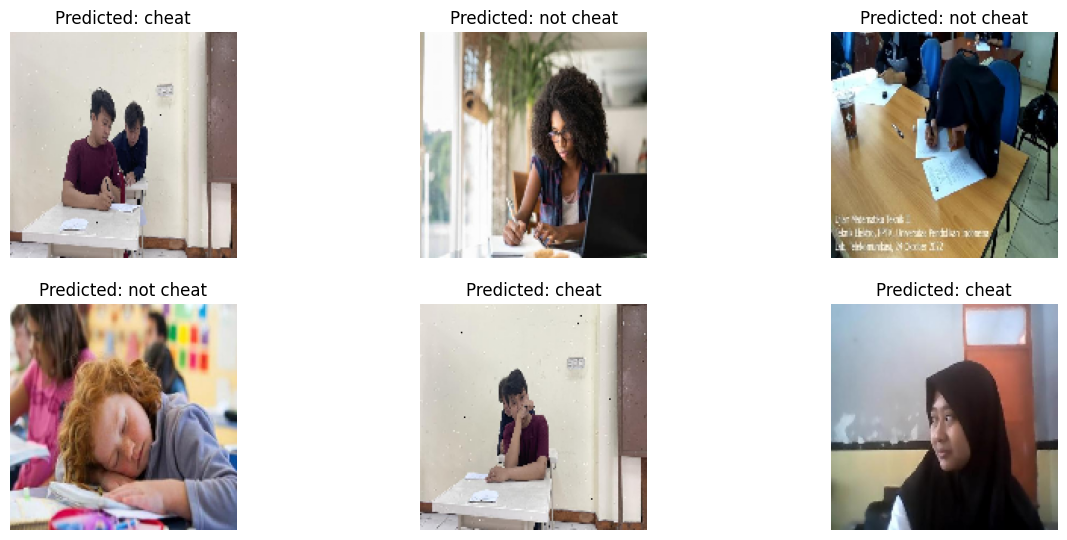

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report


model = load_model('version_0-5.keras')


class_indices = {
    0: 'cheat',
    1: 'not cheat'
}

# Function to visualize predictions
def visualize_predictions(image_paths):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths):
        test_image = image.load_img(img_path, target_size=(150, 150))
        test_image = image.img_to_array(test_image) / 255.0  
        test_image = np.expand_dims(test_image, axis=0)

        result = model.predict(test_image)
        predicted_index = np.argmax(result)
        
        plt.subplot(3, 3, i + 1)  
        plt.imshow(test_image[0])
        plt.title(f'Predicted: {class_indices[predicted_index]}')
        plt.axis('off')
    plt.show()


image_paths = [
    '/workspaces/school-cheating-ai-using-cv/new_data/cheat/IMG_6502_jpg.rf.5385cb83b0fadab87918085db1570593.jpg',
    '/workspaces/school-cheating-ai-using-cv/new_data/not_cheat/good903_jpg.rf.a512749fda5a1f61bfb18603df0b2ad0.jpg',
    '/workspaces/school-cheating-ai-using-cv/new_data/not_cheat/good102_jpg.rf.62addc6f347b04fd63d806d0abaf96ff.jpg',
    '/workspaces/school-cheating-ai-using-cv/new_data/not_cheat/good672_jpg.rf.3a3312b0aef7f8fc1d71ca57a06c7e27.jpg',
    '/workspaces/school-cheating-ai-using-cv/new_data/cheat/IMG_6504_jpg.rf.efd9e89f7e26993bad008262ec95e19f.jpg',
    '/workspaces/school-cheating-ai-using-cv/new_data/cheat/cheat426_jpg.rf.364bca857e6b9f17e7b9ff0ca3da0190.jpg'
]

visualize_predictions(image_paths)

